In [1]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

# Importing the Data From All of Us

## Importing the Birth data (response variable)

Import 'birth' dataframe with cleaned features and response variable from *Data_Cleaning_Demographics*

Note that data from *All of Us* is being imported into *Data_Cleaning_Demographics* and cleaned there,
so the import takes some time (about 2 min)

In [2]:
# Run as needed
!pip install import-ipynb


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Thanks for your patience while I import the dataframe.
importing Jupyter notebook from Data_Cleaning_Demographics.ipynb


Downloading:   0%|          | 0/390805 [00:00<?, ?rows/s]

<bound method DataFrame.info of         person_id                              standard_concept_name  \
0         1663536  Preterm labor in second trimester with preterm...   
1         2062232  Preterm labor in second trimester with preterm...   
2         6043769  Preterm labor in second trimester with preterm...   
3         2659141  Preterm labor in second trimester with preterm...   
4         3249899  Preterm labor in second trimester with preterm...   
...           ...                                                ...   
390800    1430760                          Third trimester pregnancy   
390801    3317844                          Third trimester pregnancy   
390802    2061429                          Gestation period, 8 weeks   
390803    4382057                          Third trimester pregnancy   
390804    2814607                          Third trimester pregnancy   

               condition_start_datetime  
0             2021-06-24 03:17:27+00:00  
1             2020-

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<bound method DataFrame.info of         person_id                              standard_concept_name  \
0         1839526                         Gestation period, 27 weeks   
1         1252623                         Gestation period, 27 weeks   
2         6928661                         Gestation period, 27 weeks   
3         1449784                         Gestation period, 27 weeks   
4         1424008                         Gestation period, 27 weeks   
...           ...                                                ...   
173722    2335434  Preterm labor in third trimester with preterm ...   
173723    1210649  Preterm labor in third trimester with preterm ...   
173724    1155370  Preterm labor in third trimester with preterm ...   
173725    2493897  Preterm labor in third trimester with preterm ...   
173726    2292698  Preterm labor in third trimester with preterm ...   

               condition_start_datetime condition_start_date  
0             2021-06-07 00:00:00+00:00 

Data_Cleaning_Demographics.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 1,


Entries removed: 5711
Entries kept: 15601
Statistics for Term:
          person_id  gestational_age_at_birth   birth_order
count  1.343400e+04              13434.000000  13434.000000
mean   2.958510e+06                 38.841638      1.276165
std    2.116125e+06                  1.067879      0.530288
min    1.000131e+06                 37.000000      1.000000
25%    1.565325e+06                 38.000000      1.000000
50%    2.200748e+06                 39.000000      1.000000
75%    3.260879e+06                 40.000000      1.000000
max    9.998770e+06                 44.000000      5.000000

Statistics for Preterm:
          person_id  gestational_age_at_birth  birth_order
count  2.167000e+03               2167.000000  2167.000000
mean   2.857171e+06                 33.389149     1.228426
std    2.002075e+06                  3.381602     0.488997
min    1.001034e+06                 22.000000     1.000000
25%    1.559583e+06                 32.000000     1.000000
50%    2.174813e+0

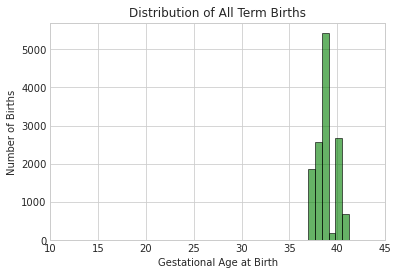

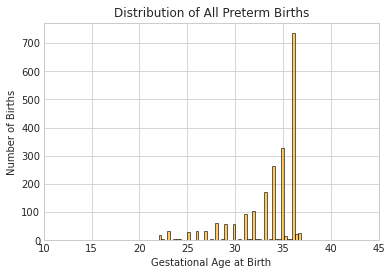

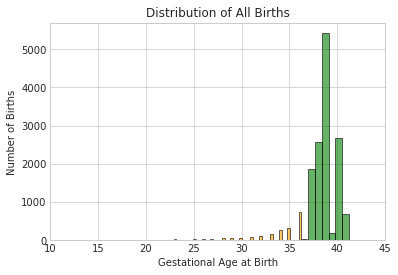

Downloading:   0%|          | 0/17524 [00:00<?, ?rows/s]

Downloading:   0%|          | 0/17517 [00:00<?, ?rows/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   person_id                           15593 non-null  Int64              
 1   gender_person                       15593 non-null  object             
 2   date_of_birth_person                15593 non-null  datetime64[ns, UTC]
 3   race_person                         15593 non-null  object             
 4   ethnicity_person                    15593 non-null  object             
 5   sex_at_birth_person                 15593 non-null  object             
 6   observation_datetime_zip            15593 non-null  datetime64[ns, UTC]
 7   zip_code_zip                        15593 non-null  object             
 8   assisted_income_zip                 15593 non-null  float64            
 9   high_school_education_zip           155

In [3]:
import import_ipynb
print("Thanks for your patience while I import the dataframe.")
from Data_Cleaning_Demographics import *
print("All done.")

## Importing DOB Data

In [4]:
import pandas
import os

# This query represents dataset "Birth_Diabetes_Test" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_24817314_person_sql = """
    SELECT
        person.person_id,
        person.birth_datetime as date_of_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person   
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) 
                        AND cb_search_person.person_id IN (
                            SELECT
                                criteria.person_id 
                            FROM
                                (SELECT
                                    DISTINCT person_id,
                                    entry_date,
                                    concept_id 
                                FROM
                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                WHERE
                                    (
                                        concept_id IN (903124) 
                                        AND is_standard = 0 
                                    )) criteria ) 
                        )"""

dataset_24817314_person_df = pandas.read_gbq(
    dataset_24817314_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_24817314_person_df.head(5)

Downloading:   0%|          | 0/16016 [00:00<?, ?rows/s]

,person_id,date_of_birth
0,4721252,1987-06-15 00:00:00+00:00
1,1419254,2001-06-15 00:00:00+00:00
2,1192363,1971-06-15 00:00:00+00:00
3,1446224,1992-06-15 00:00:00+00:00
4,2764524,1979-06-15 00:00:00+00:00


## Importing the BMI Data

In [5]:
import pandas
import os

# This query represents dataset "Health Predictors (BMI, Smoking, Drinking)" for domain "measurement" and was generated for All of Us Controlled Tier Dataset v7
dataset_38394017_measurement_sql = """
    SELECT
        measurement.person_id,
        measurement.measurement_concept_id,
        m_standard_concept.concept_name as standard_concept_name,
        m_standard_concept.concept_code as standard_concept_code,
        m_standard_concept.vocabulary_id as standard_vocabulary,
        measurement.measurement_datetime,
        measurement.measurement_type_concept_id,
        m_type.concept_name as measurement_type_concept_name,
        measurement.operator_concept_id,
        m_operator.concept_name as operator_concept_name,
        measurement.value_as_number,
        measurement.value_as_concept_id,
        m_value.concept_name as value_as_concept_name,
        measurement.unit_concept_id,
        m_unit.concept_name as unit_concept_name,
        measurement.range_low,
        measurement.range_high,
        measurement.visit_occurrence_id,
        m_visit.concept_name as visit_occurrence_concept_name,
        measurement.measurement_source_value,
        measurement.measurement_source_concept_id,
        m_source_concept.concept_name as source_concept_name,
        m_source_concept.concept_code as source_concept_code,
        m_source_concept.vocabulary_id as source_vocabulary,
        measurement.unit_source_value,
        measurement.value_source_value 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.measurement` measurement 
        WHERE
            (
                measurement_source_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    903124
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 0 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    measurement.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) measurement 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_standard_concept 
                                ON measurement.measurement_concept_id = m_standard_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_type 
                                ON measurement.measurement_type_concept_id = m_type.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_operator 
                                ON measurement.operator_concept_id = m_operator.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_value 
                                ON measurement.value_as_concept_id = m_value.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_unit 
                                ON measurement.unit_concept_id = m_unit.concept_id 
                        LEFT JOIn
                            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                                ON measurement.visit_occurrence_id = v.visit_occurrence_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_visit 
                                ON v.visit_concept_id = m_visit.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_source_concept 
                                ON measurement.measurement_source_concept_id = m_source_concept.concept_id"""

dataset_38394017_measurement_df = pandas.read_gbq(
    dataset_38394017_measurement_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_38394017_measurement_df.head(5)

Downloading:   0%|          | 0/16016 [00:00<?, ?rows/s]

,person_id,measurement_concept_id,standard_concept_name,standard_concept_code,standard_vocabulary,measurement_datetime,measurement_type_concept_id,measurement_type_concept_name,operator_concept_id,operator_concept_name,value_as_number,value_as_concept_id,value_as_concept_name,unit_concept_id,unit_concept_name,range_low,range_high,visit_occurrence_id,visit_occurrence_concept_name,measurement_source_value,measurement_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,unit_source_value,value_source_value
0,2549639,3038553,Body mass index (BMI) [Ratio],39156-5,LOINC,2022-06-30 16:49:30+00:00,44818701,From physical examination,0,No matching concept,36.900002,0,No matching concept,9531,kilogram per square meter,NaN,NaN,1000000961838845,Outpatient Visit,bmi,903124,Computed body mass index,bmi,PPI,kg/m2,No matching concept
1,1821101,3038553,Body mass index (BMI) [Ratio],39156-5,LOINC,2018-06-26 21:39:45+00:00,44818701,From physical examination,0,No matching concept,23.100000,0,No matching concept,9531,kilogram per square meter,NaN,NaN,1000000717641066,Outpatient Visit,bmi,903124,Computed body mass index,bmi,PPI,kg/m2,No matching concept
2,3086685,3038553,Body mass index (BMI) [Ratio],39156-5,LOINC,2019-04-24 15:28:15+00:00,44818701,From physical examination,0,No matching concept,48.700001,0,No matching concept,9531,kilogram per square meter,NaN,NaN,1000000613515452,Outpatient Visit,bmi,903124,Computed body mass index,bmi,PPI,kg/m2,No matching concept
3,3417520,3038553,Body mass index (BMI) [Ratio],39156-5,LOINC,2018-12-10 20:55:19+00:00,44818701,From physical examination,0,No matching concept,34.700001,0,No matching concept,9531,kilogram per square meter,NaN,NaN,1000000877024283,Outpatient Visit,bmi,903124,Computed body mass index,bmi,PPI,kg/m2,No matching concept
4,1088905,3038553,Body mass index (BMI) [Ratio],39156-5,LOINC,2019-06-19 16:59:44+00:00,44818701,From physical examination,0,No matching concept,34.700001,0,No matching concept,9531,kilogram per square meter,NaN,NaN,1000000805746391,Outpatient Visit,bmi,903124,Computed body mass index,bmi,PPI,kg/m2,No matching concept


## Importing the Drinking Data

In [6]:
import pandas
import os

# This query represents dataset "Health Predictors (BMI, Smoking, Drinking)" for domain "survey" and was generated for All of Us Controlled Tier Dataset v7
dataset_38394017_survey_sql = """
    SELECT
        answer.person_id,
        answer.survey_datetime,
        answer.survey,
        answer.question_concept_id,
        answer.question,
        answer.answer_concept_id,
        answer.answer,
        answer.survey_version_concept_id,
        answer.survey_version_name  
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.ds_survey` answer   
    WHERE
        (
            question_concept_id IN (
                1585636, 1586198, 1586201, 1586207, 1586213
            )
        )  
        AND (
            answer.PERSON_ID IN (
                SELECT
                    distinct person_id  
                FROM
                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                WHERE
                    cb_search_person.person_id IN (
                        SELECT
                            criteria.person_id 
                        FROM
                            (SELECT
                                DISTINCT person_id,
                                entry_date,
                                concept_id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                            WHERE
                                (
                                    concept_id IN (
                                        SELECT
                                            DISTINCT c.concept_id 
                                        FROM
                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                        JOIN
                                            (
                                                select
                                                    cast(cr.id as string) as id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                WHERE
                                                    concept_id IN (36712702, 45757176, 4014295) 
                                                    AND full_text LIKE '%_rank1]%'
                                            ) a 
                                                ON (
                                                    c.path LIKE CONCAT('%.',
                                                a.id,
                                                '.%') 
                                                OR c.path LIKE CONCAT('%.',
                                                a.id) 
                                                OR c.path LIKE CONCAT(a.id,
                                                '.%') 
                                                OR c.path = a.id) 
                                            WHERE
                                                is_standard = 1 
                                                AND is_selectable = 1
                                            ) 
                                            AND is_standard = 1 
                                    )
                                ) criteria 
                            ) 
                            AND cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (903124) 
                                            AND is_standard = 0 
                                        )) criteria ) 
                            )
                        )"""

dataset_38394017_survey_df = pandas.read_gbq(
    dataset_38394017_survey_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_38394017_survey_df.head(5)

Downloading:   0%|          | 0/73363 [00:00<?, ?rows/s]

,person_id,survey_datetime,survey,question_concept_id,question,answer_concept_id,answer,survey_version_concept_id,survey_version_name
0,1619383,2019-10-09 16:43:33+00:00,Lifestyle,1586198,Alcohol: Alcohol Participant,1586200,Alcohol Participant: No,<NA>,None
1,1730018,2019-01-18 19:00:40+00:00,Lifestyle,1586198,Alcohol: Alcohol Participant,1586200,Alcohol Participant: No,<NA>,None
2,3231763,2019-05-03 16:23:31+00:00,Lifestyle,1586198,Alcohol: Alcohol Participant,1586200,Alcohol Participant: No,<NA>,None
3,1438023,2019-10-21 15:49:22+00:00,Lifestyle,1586198,Alcohol: Alcohol Participant,1586200,Alcohol Participant: No,<NA>,None
4,1158661,2019-05-09 15:25:59+00:00,Lifestyle,1586198,Alcohol: Alcohol Participant,1586200,Alcohol Participant: No,<NA>,None


## Importing the Smoking Data

In [7]:
import pandas
import os

# This query represents dataset "Health Predictors (BMI, Smoking, Drinking)" for domain "observation" and was generated for All of Us Controlled Tier Dataset v7
dataset_38394017_observation_sql = """
    SELECT
        observation.person_id,
        observation.observation_concept_id,
        o_standard_concept.concept_name as standard_concept_name,
        o_standard_concept.concept_code as standard_concept_code,
        o_standard_concept.vocabulary_id as standard_vocabulary,
        observation.observation_datetime,
        observation.observation_type_concept_id,
        o_type.concept_name as observation_type_concept_name,
        observation.value_as_number,
        observation.value_as_string,
        observation.value_as_concept_id,
        o_value.concept_name as value_as_concept_name,
        observation.qualifier_concept_id,
        o_qualifier.concept_name as qualifier_concept_name,
        observation.unit_concept_id,
        o_unit.concept_name as unit_concept_name,
        observation.visit_occurrence_id,
        o_visit.concept_name as visit_occurrence_concept_name,
        observation.observation_source_value,
        observation.observation_source_concept_id,
        o_source_concept.concept_name as source_concept_name,
        o_source_concept.concept_code as source_concept_code,
        o_source_concept.vocabulary_id as source_vocabulary,
        observation.unit_source_value,
        observation.qualifier_source_value,
        observation.value_source_concept_id,
        observation.value_source_value,
        observation.questionnaire_response_id 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
        WHERE
            (
                observation_concept_id IN (
                    4275495, 4276526, 43054909
                ) 
                OR  observation_source_concept_id IN (
                    1585636, 1586198, 1586201, 1586207, 1586213
                )
            )  
            AND (
                observation.PERSON_ID IN (
                    SELECT
                        distinct person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                    WHERE
                        cb_search_person.person_id IN (
                            SELECT
                                criteria.person_id 
                            FROM
                                (SELECT
                                    DISTINCT person_id,
                                    entry_date,
                                    concept_id 
                                FROM
                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                WHERE
                                    (
                                        concept_id IN (
                                            SELECT
                                                DISTINCT c.concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                            JOIN
                                                (
                                                    select
                                                        cast(cr.id as string) as id 
                                                    FROM
                                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                    WHERE
                                                        concept_id IN (36712702, 45757176, 4014295) 
                                                        AND full_text LIKE '%_rank1]%'
                                                ) a 
                                                    ON (
                                                        c.path LIKE CONCAT('%.',
                                                    a.id,
                                                    '.%') 
                                                    OR c.path LIKE CONCAT('%.',
                                                    a.id) 
                                                    OR c.path LIKE CONCAT(a.id,
                                                    '.%') 
                                                    OR c.path = a.id) 
                                                WHERE
                                                    is_standard = 1 
                                                    AND is_selectable = 1
                                                ) 
                                                AND is_standard = 1 
                                        )
                                    ) criteria 
                                ) 
                                AND cb_search_person.person_id IN (
                                    SELECT
                                        criteria.person_id 
                                    FROM
                                        (SELECT
                                            DISTINCT person_id,
                                            entry_date,
                                            concept_id 
                                        FROM
                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                        WHERE
                                            (
                                                concept_id IN (903124) 
                                                AND is_standard = 0 
                                            )) criteria ) 
                                )
                            )) observation 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_standard_concept 
                            ON observation.observation_concept_id = o_standard_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_type 
                            ON observation.observation_type_concept_id = o_type.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_value 
                            ON observation.value_as_concept_id = o_value.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_qualifier 
                            ON observation.qualifier_concept_id = o_qualifier.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_unit 
                            ON observation.unit_concept_id = o_unit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                            ON observation.visit_occurrence_id = v.visit_occurrence_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_visit 
                            ON v.visit_concept_id = o_visit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` o_source_concept 
                            ON observation.observation_source_concept_id = o_source_concept.concept_id"""

dataset_38394017_observation_df = pandas.read_gbq(
    dataset_38394017_observation_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_38394017_observation_df.head(5)

Downloading:   0%|          | 0/263788 [00:00<?, ?rows/s]

,person_id,observation_concept_id,standard_concept_name,standard_concept_code,standard_vocabulary,observation_datetime,observation_type_concept_id,observation_type_concept_name,value_as_number,value_as_string,value_as_concept_id,value_as_concept_name,qualifier_concept_id,qualifier_concept_name,unit_concept_id,unit_concept_name,visit_occurrence_id,visit_occurrence_concept_name,observation_source_value,observation_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,unit_source_value,qualifier_source_value,value_source_concept_id,value_source_value,questionnaire_response_id
0,3013338,4275495,Tobacco smoking behavior - finding,365981007,SNOMED,2016-10-26 04:00:00+00:00,32865,Patient self-report,NaN,266919005,4144272,Never smoked tobacco,<NA>,None,<NA>,None,<NA>,None,None,<NA>,None,None,None,None,None,<NA>,None,<NA>
1,2196660,4275495,Tobacco smoking behavior - finding,365981007,SNOMED,2020-10-09 04:00:00+00:00,32865,Patient self-report,NaN,266919005,4144272,Never smoked tobacco,<NA>,None,<NA>,None,<NA>,None,None,<NA>,None,None,None,None,None,<NA>,None,<NA>
2,3372270,4275495,Tobacco smoking behavior - finding,365981007,SNOMED,2021-12-10 05:00:00+00:00,32865,Patient self-report,NaN,266919005,4144272,Never smoked tobacco,<NA>,None,<NA>,None,<NA>,None,None,<NA>,None,None,None,None,None,<NA>,None,<NA>
3,1749659,4275495,Tobacco smoking behavior - finding,365981007,SNOMED,2020-03-10 04:00:00+00:00,32865,Patient self-report,NaN,266919005,4144272,Never smoked tobacco,<NA>,None,<NA>,None,<NA>,None,None,<NA>,None,None,None,None,None,<NA>,None,<NA>
4,9797895,4275495,Tobacco smoking behavior - finding,365981007,SNOMED,2021-06-24 04:00:00+00:00,32865,Patient self-report,NaN,266919005,4144272,Never smoked tobacco,<NA>,None,<NA>,None,<NA>,None,None,<NA>,None,None,None,None,None,<NA>,None,<NA>


## Importing the Diabetes Data

In [8]:
import pandas
import os

# This query represents dataset "Birth_Diabetes_Test" for domain "condition" and was generated for All of Us Controlled Tier Dataset v7
dataset_55961866_condition_sql = """
    SELECT
        c_occurrence.person_id,
        c_occurrence.condition_concept_id,
        c_standard_concept.concept_name as standard_concept_name,
        c_standard_concept.concept_code as standard_concept_code,
        c_standard_concept.vocabulary_id as standard_vocabulary,
        c_occurrence.condition_start_datetime,
        c_occurrence.condition_end_datetime,
        c_occurrence.condition_type_concept_id,
        c_type.concept_name as condition_type_concept_name,
        c_occurrence.stop_reason,
        c_occurrence.visit_occurrence_id,
        visit.concept_name as visit_occurrence_concept_name,
        c_occurrence.condition_source_value,
        c_occurrence.condition_source_concept_id,
        c_source_concept.concept_name as source_concept_name,
        c_source_concept.concept_code as source_concept_code,
        c_source_concept.vocabulary_id as source_vocabulary,
        c_occurrence.condition_status_source_value,
        c_occurrence.condition_status_concept_id,
        c_status.concept_name as condition_status_concept_name 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.condition_occurrence` c_occurrence 
        WHERE
            (
                condition_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    201820, 201826, 37016349, 37311673
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 1 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    c_occurrence.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) c_occurrence 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_standard_concept 
                                ON c_occurrence.condition_concept_id = c_standard_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_type 
                                ON c_occurrence.condition_type_concept_id = c_type.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                                ON c_occurrence.visit_occurrence_id = v.visit_occurrence_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` visit 
                                ON v.visit_concept_id = visit.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_source_concept 
                                ON c_occurrence.condition_source_concept_id = c_source_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_status 
                                ON c_occurrence.condition_status_concept_id = c_status.concept_id"""

dataset_55961866_condition_df = pandas.read_gbq(
    dataset_55961866_condition_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_55961866_condition_df.head(10)

Downloading:   0%|          | 0/109418 [00:00<?, ?rows/s]

,person_id,condition_concept_id,standard_concept_name,standard_concept_code,standard_vocabulary,condition_start_datetime,condition_end_datetime,condition_type_concept_id,condition_type_concept_name,stop_reason,visit_occurrence_id,visit_occurrence_concept_name,condition_source_value,condition_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,condition_status_source_value,condition_status_concept_id,condition_status_concept_name
0,1763905,43531007,Pre-existing diabetes mellitus in pregnancy,609563008,SNOMED,2015-10-08 00:00:00+00:00,NaT,44786629,Secondary Condition,None,9000000004320399,Office Visit,O24.319,45587294,Unspecified pre-existing diabetes mellitus in ...,O24.319,ICD10CM,None,<NA>,None
1,2214072,43531010,Pre-existing type 2 diabetes mellitus in pregn...,609567009,SNOMED,2018-05-16 04:00:00+00:00,NaT,32821,EHR billing record,None,<NA>,None,O24.111,45587292,"Pre-existing type 2 diabetes mellitus, in preg...",O24.111,ICD10CM,None,<NA>,None
2,2022767,4024659,Gestational diabetes mellitus,11687002,SNOMED,2017-07-10 00:00:00+00:00,2017-07-10 11:59:59+00:00,44786629,Secondary Condition,None,27000000009094488,Inpatient Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
3,1076902,4024659,Gestational diabetes mellitus,11687002,SNOMED,2016-01-28 00:00:00+00:00,NaT,44786629,Secondary Condition,None,9000000000032098,Office Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
4,1017311,4024659,Gestational diabetes mellitus,11687002,SNOMED,2017-03-03 00:00:00+00:00,NaT,44786627,Primary Condition,None,9000000005611079,Emergency Room Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
5,9775892,4024659,Gestational diabetes mellitus,11687002,SNOMED,2020-05-07 08:11:00+00:00,2020-05-07 11:59:59+00:00,44786629,Secondary Condition,None,27000000003227536,Outpatient Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
6,3270695,4024659,Gestational diabetes mellitus,11687002,SNOMED,2017-08-30 13:47:00+00:00,2017-08-30 11:59:59+00:00,44786627,Primary Condition,None,27000000005885704,Outpatient Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
7,3018147,4024659,Gestational diabetes mellitus,11687002,SNOMED,2021-05-12 06:00:00+00:00,NaT,32821,EHR billing record,None,42000000120590568,Outpatient Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
8,1793069,4024659,Gestational diabetes mellitus,11687002,SNOMED,2021-05-21 00:00:00+00:00,NaT,44786627,Primary Condition,None,44000000000327280,Outpatient Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None
9,2250842,4024659,Gestational diabetes mellitus,11687002,SNOMED,2019-06-19 00:00:00+00:00,2019-06-19 11:59:59+00:00,44786627,Primary Condition,None,27000000004569616,Outpatient Visit,O24.410,45553483,"Gestational diabetes mellitus in pregnancy, di...",O24.410,ICD10CM,None,<NA>,None


## Importing the Depression & Anxiety Data

In [9]:
import pandas
import os

# This query represents dataset "Birth_Depression_Anxiety" for domain "condition" and was generated for All of Us Controlled Tier Dataset v7
dataset_79875266_condition_sql = """
    SELECT
        c_occurrence.person_id,
        c_occurrence.condition_concept_id,
        c_standard_concept.concept_name as standard_concept_name,
        c_standard_concept.concept_code as standard_concept_code,
        c_standard_concept.vocabulary_id as standard_vocabulary,
        c_occurrence.condition_start_datetime,
        c_occurrence.condition_end_datetime,
        c_occurrence.condition_type_concept_id,
        c_type.concept_name as condition_type_concept_name,
        c_occurrence.stop_reason,
        c_occurrence.visit_occurrence_id,
        visit.concept_name as visit_occurrence_concept_name,
        c_occurrence.condition_source_value,
        c_occurrence.condition_source_concept_id,
        c_source_concept.concept_name as source_concept_name,
        c_source_concept.concept_code as source_concept_code,
        c_source_concept.vocabulary_id as source_vocabulary,
        c_occurrence.condition_status_source_value,
        c_occurrence.condition_status_concept_id,
        c_status.concept_name as condition_status_concept_name 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.condition_occurrence` c_occurrence 
        WHERE
            (
                condition_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    440383, 442077
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 1 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    c_occurrence.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) c_occurrence 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_standard_concept 
                                ON c_occurrence.condition_concept_id = c_standard_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_type 
                                ON c_occurrence.condition_type_concept_id = c_type.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                                ON c_occurrence.visit_occurrence_id = v.visit_occurrence_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` visit 
                                ON v.visit_concept_id = visit.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_source_concept 
                                ON c_occurrence.condition_source_concept_id = c_source_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_status 
                                ON c_occurrence.condition_status_concept_id = c_status.concept_id"""

dataset_79875266_condition_df = pandas.read_gbq(
    dataset_79875266_condition_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_79875266_condition_df.head(10)

Downloading:   0%|          | 0/240666 [00:00<?, ?rows/s]

,person_id,condition_concept_id,standard_concept_name,standard_concept_code,standard_vocabulary,condition_start_datetime,condition_end_datetime,condition_type_concept_id,condition_type_concept_name,stop_reason,visit_occurrence_id,visit_occurrence_concept_name,condition_source_value,condition_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,condition_status_source_value,condition_status_concept_id,condition_status_concept_name
0,1585928,4077577,Moderate recurrent major depression,18818009,SNOMED,2021-03-25 00:00:00+00:00,NaT,44786627,Primary Condition,None,44000000001562112,Outpatient Visit,18818009,4077577,Moderate recurrent major depression,18818009,SNOMED,None,<NA>,None
1,1340735,4304010,Phobic disorder,386810004,SNOMED,2020-01-14 18:06:00+00:00,2020-01-14 11:59:59+00:00,44786627,Primary Condition,None,27000000002140896,Outpatient Visit,F40.9,35207168,"Phobic anxiety disorder, unspecified",F40.9,ICD10CM,None,<NA>,None
2,3356091,434911,"Recurrent major depressive episodes, severe, w...",191613003,SNOMED,2012-08-14 00:00:00+00:00,2012-08-14 11:59:59+00:00,44786627,Primary Condition,None,27000000003324592,Outpatient Visit,296.34,44827655,"Major depressive affective disorder, recurrent...",296.34,ICD9CM,None,<NA>,None
3,3356091,434911,"Recurrent major depressive episodes, severe, w...",191613003,SNOMED,2012-09-11 00:00:00+00:00,2012-09-11 11:59:59+00:00,44786629,Secondary Condition,None,27000000010598228,Outpatient Visit,296.34,44827655,"Major depressive affective disorder, recurrent...",296.34,ICD9CM,None,<NA>,None
4,1407176,433991,Recurrent major depression in remission,68019004,SNOMED,2020-10-13 00:00:00+00:00,2020-10-13 11:59:59+00:00,0,No matching concept,None,27000000001023976,Outpatient Visit,F33.40,45547706,"Major depressive disorder, recurrent, in remis...",F33.40,ICD10CM,None,<NA>,None
5,1031320,4049623,"Moderate major depression, single episode",15639000,SNOMED,2013-08-14 04:00:00+00:00,NaT,32821,EHR billing record,None,33000000006200640,Outpatient Visit,296.22,44827654,"Major depressive affective disorder, single ep...",296.22,ICD9CM,None,<NA>,None
6,2048065,4049623,"Moderate major depression, single episode",15639000,SNOMED,2014-02-13 00:00:00+00:00,2014-02-13 11:59:59+00:00,44786629,Secondary Condition,None,27000000002928632,Outpatient Visit,296.22,44827654,"Major depressive affective disorder, single ep...",296.22,ICD9CM,None,<NA>,None
7,1089246,442077,Anxiety disorder,197480006,SNOMED,2018-09-04 06:00:00+00:00,NaT,32810,Claim,None,42000000120062944,Inpatient Visit,F41.8,35207172,Other specified anxiety disorders,F41.8,ICD10CM,None,<NA>,None
8,1564976,442077,Anxiety disorder,197480006,SNOMED,2019-06-30 06:00:00+00:00,NaT,32821,EHR billing record,None,42000000074731944,Inpatient Visit,F41.8,35207172,Other specified anxiety disorders,F41.8,ICD10CM,None,<NA>,None
9,3133359,442077,Anxiety disorder,197480006,SNOMED,2022-06-10 00:00:00+00:00,NaT,44786629,Secondary Condition,None,31000000048194812,Office Visit,F41.8,35207172,Other specified anxiety disorders,F41.8,ICD10CM,None,<NA>,None


## Importing the Drug Abuse Data

In [10]:
import pandas
import os

# This query represents dataset "Birth_Drug_Abuse" for domain "condition" and was generated for All of Us Controlled Tier Dataset v7
dataset_07549439_condition_sql = """
    SELECT
        c_occurrence.person_id,
        c_occurrence.condition_concept_id,
        c_standard_concept.concept_name as standard_concept_name,
        c_standard_concept.concept_code as standard_concept_code,
        c_standard_concept.vocabulary_id as standard_vocabulary,
        c_occurrence.condition_start_datetime,
        c_occurrence.condition_end_datetime,
        c_occurrence.condition_type_concept_id,
        c_type.concept_name as condition_type_concept_name,
        c_occurrence.stop_reason,
        c_occurrence.visit_occurrence_id,
        visit.concept_name as visit_occurrence_concept_name,
        c_occurrence.condition_source_value,
        c_occurrence.condition_source_concept_id,
        c_source_concept.concept_name as source_concept_name,
        c_source_concept.concept_code as source_concept_code,
        c_source_concept.vocabulary_id as source_vocabulary,
        c_occurrence.condition_status_source_value,
        c_occurrence.condition_status_concept_id,
        c_status.concept_name as condition_status_concept_name 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.condition_occurrence` c_occurrence 
        WHERE
            (
                condition_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    436954
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 1 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    c_occurrence.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) c_occurrence 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_standard_concept 
                                ON c_occurrence.condition_concept_id = c_standard_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_type 
                                ON c_occurrence.condition_type_concept_id = c_type.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                                ON c_occurrence.visit_occurrence_id = v.visit_occurrence_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` visit 
                                ON v.visit_concept_id = visit.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_source_concept 
                                ON c_occurrence.condition_source_concept_id = c_source_concept.concept_id 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_status 
                                ON c_occurrence.condition_status_concept_id = c_status.concept_id"""

dataset_07549439_condition_df = pandas.read_gbq(
    dataset_07549439_condition_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_07549439_condition_df.head(5)

Downloading:   0%|          | 0/3526 [00:00<?, ?rows/s]

,person_id,condition_concept_id,standard_concept_name,standard_concept_code,standard_vocabulary,condition_start_datetime,condition_end_datetime,condition_type_concept_id,condition_type_concept_name,stop_reason,visit_occurrence_id,visit_occurrence_concept_name,condition_source_value,condition_source_concept_id,source_concept_name,source_concept_code,source_vocabulary,condition_status_source_value,condition_status_concept_id,condition_status_concept_name
0,8014855,4143110,Episodic drug abuse,425533007,SNOMED,2007-10-11 06:00:00+00:00,NaT,32821,EHR billing record,None,42000000158478896,Outpatient Visit,305.22,44821828,"Cannabis abuse, episodic",305.22,ICD9CM,None,<NA>,None
1,2787191,4145220,"Drug abuse, continuous",426590003,SNOMED,2015-05-31 00:00:00+00:00,2015-05-31 11:59:59+00:00,44786629,Secondary Condition,None,27000000007258808,Outpatient Visit,305.91,44832251,"Other, mixed, or unspecified drug abuse, conti...",305.91,ICD9CM,None,<NA>,None
2,3505972,43530681,Drug abuse in remission,1471000119103,SNOMED,2016-02-22 00:00:00+00:00,NaT,44786627,Primary Condition,None,9000000002709915,Office Visit,305.73,44829941,Amphetamine or related acting sympathomimetic ...,305.73,ICD9CM,None,<NA>,None
3,1671187,43530681,Drug abuse in remission,1471000119103,SNOMED,2012-06-06 06:00:00+00:00,NaT,32821,EHR billing record,None,42000000022083000,Inpatient Visit,305.03,44831103,"Alcohol abuse, in remission",305.03,ICD9CM,None,<NA>,None
4,1773386,43530681,Drug abuse in remission,1471000119103,SNOMED,2007-04-26 06:00:00+00:00,NaT,32821,EHR billing record,None,42000000053894792,Outpatient Visit,305.23,44829937,"Cannabis abuse, in remission",305.23,ICD9CM,None,<NA>,None


# Combining each data frame into a single data frame

## Importing needed packages

In [11]:
import pandas as pd

## Renaming individual data frames and dropping columns we don't need

In [12]:
# condition_df

condition_df = birth



# dob_df (date of birth)

dob_df = dataset_24817314_person_df



# bmi_df

bmi_df_drop_columns = dataset_38394017_measurement_df.columns.tolist()


bmi_df_drop_columns.remove('person_id')
bmi_df_drop_columns.remove('value_as_number')
# bmi_df_drop_columns.remove('range_low') - upon investigation, not helpful
# bmi_df_drop_columns.remove('range_high') - upon investigation, not helpful
# bmi_df_drop_columns.remove('unit_source_value') - confirmed all observations using same units (kg/m^2)

bmi_df = dataset_38394017_measurement_df.drop(columns=bmi_df_drop_columns).rename(columns={'value_as_number':'BMI'}).copy()



# drinking_df

drinking_df_drop_columns = dataset_38394017_survey_df.columns.tolist()

drinking_df_drop_columns.remove('person_id')
drinking_df_drop_columns.remove('question')
drinking_df_drop_columns.remove('answer')

drinking_df = dataset_38394017_survey_df.drop(columns=drinking_df_drop_columns).copy()



# smoking_df

smoking_df_drop_columns = dataset_38394017_observation_df.columns.tolist()

smoking_df_drop_columns.remove('person_id')
smoking_df_drop_columns.remove('standard_concept_name')
#smoking_df_drop_columns.remove('observation_datetime') - won't be able to use for all data
#smoking_df_drop_columns.remove('observation_type_concept_name') - won't be able to use for all data
smoking_df_drop_columns.remove('value_as_concept_name')
#smoking_df_drop_columns.remove('visit_occurrence_concept_name') - won't be able to use for all data
#smoking_df_drop_columns.remove('source_concept_name') - won't be able to use for all data

smoking_df = dataset_38394017_observation_df.drop(columns=smoking_df_drop_columns).copy()



# diabetes_df
diabetes_df_drop_columns = dataset_55961866_condition_df.columns.tolist()

diabetes_df_drop_columns.remove('person_id')
diabetes_df_drop_columns.remove('standard_concept_name')
diabetes_df_drop_columns.remove('condition_start_datetime') # could also include condition_end_datetime?

diabetes_df = dataset_55961866_condition_df.drop(columns=diabetes_df_drop_columns).copy()


# mental_df (depression & anxiety)
mental_df_drop_columns = dataset_79875266_condition_df.columns.tolist()

mental_df_drop_columns.remove('person_id')
mental_df_drop_columns.remove('standard_concept_name')
mental_df_drop_columns.remove('condition_start_datetime')

mental_df = dataset_79875266_condition_df.drop(columns=mental_df_drop_columns).copy()


# drug_df (drug abuse)
drug_df_drop_columns = dataset_07549439_condition_df.columns.tolist()

drug_df_drop_columns.remove('person_id')
drug_df_drop_columns.remove('standard_concept_name')
drug_df_drop_columns.remove('condition_start_datetime')

drug_df = dataset_07549439_condition_df.drop(columns=mental_df_drop_columns).copy()

## Finding common values of *person_id* and restricting data frames to rows with common values

In [13]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

unique_ids_condition = list(condition_df.person_id.unique())
unique_ids_dob = list(dob_df.person_id.unique())
unique_ids_bmi = list(bmi_df.person_id.unique())
unique_ids_drinking = list(drinking_df.person_id.unique())
unique_ids_smoking = list(smoking_df.person_id.unique())

In [14]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

# Note: not including diabetes_df or mental_df here because it restricts the number of entries & we are 
# assuming that people not in these data frames don't have the condition
for pid in unique_ids_condition:
    if (pid in unique_ids_dob) and (pid in unique_ids_bmi) and (pid in unique_ids_drinking) and (pid in unique_ids_smoking):
        common_ids.append(pid)

common_ids.sort()


In [15]:
## restrict data frames to rows with personal_id values in common_ids
## Also, we sort by person_id

## For restricted condition, we primarily sort by person_id, but
## for each value of person_id, we then sort by birth order

restricted_condition = condition_df[condition_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id", "birth_order"])
restricted_dob = dob_df[dob_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_bmi = bmi_df[bmi_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_drinking = drinking_df[drinking_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_smoking = smoking_df[smoking_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])

In [16]:
# Check shapes of each df
print(restricted_condition.shape)
print(restricted_dob.shape)
print(restricted_bmi.shape)
print(restricted_drinking.shape)
print(restricted_smoking.shape)

(13689, 16)
(10581, 2)
(10581, 2)
(47815, 3)
(161683, 3)


## Splitting up restricted data frames

We will break up `restricted_condition` by `birth_order`, `restricted_drinking` by `question`, and `restricted_smoking` by `standard_concept_name`

### We start by splitting up *restricted_condition* by *birth_order*

In [17]:
## Note that as of 17 Nov 2023, we see
## Everyone (10588) has a first birth
## 2703 out of 10588 have a second birth
## 374 out of 10588 have a third birth
## 31 out of 10588 have a fourth birth
## 1 out of 10588 have a fifth birth
## For run time concerns, we only include first, second, and third births

first_birth = restricted_condition[restricted_condition['birth_order'] == 1].copy().sort_values(by=["person_id"])
second_birth = restricted_condition[restricted_condition['birth_order'] == 2].copy().sort_values(by=["person_id"])
third_birth = restricted_condition[restricted_condition['birth_order'] == 3].copy().sort_values(by=["person_id"])

### Then, we calculate maternal age for each birth using `restricted_age`

### Next, we break up `restricted_drinking` by question

We split up `restricted_drinking` by the four questions asked, which approximately are:
1) Have you ever drank alcohol (aside from a sip or taste)?  
2) How frequently do you drink?  
3) How many drinks do you have daily, on average?  
4) How many times in the past year have you had six or more drinks?  

We then drop the question column and rename the answer column in each case.

Finally, since not all values of `person_id` answer every question, we make a new list of values of `person_id` which do answer every question in `restricted_drinking`. Note that everyone has answered question 1.

Also, since there are only two responses (yes and no) to question 1, we also create a binary version of the responses

In [18]:
drinking_part = restricted_drinking[restricted_drinking['question'] == 'Alcohol: Alcohol Participant'].copy().sort_values(by=['person_id'])

drinking_freq = restricted_drinking[restricted_drinking['question'] == 'Alcohol: Drink Frequency Past Year'].copy().sort_values(by=['person_id'])

drinking_avg = restricted_drinking[restricted_drinking['question'] == 'Alcohol: Average Daily Drink Count'].copy().sort_values(by=['person_id'])

drinking_six = restricted_drinking[restricted_drinking['question'] == 'Alcohol: 6 or More Drinks Occurrence'].copy().sort_values(by=['person_id'])

In [19]:
drinking_part = drinking_part.drop(columns=['question']).copy()
drinking_part = drinking_part.rename(columns={'answer':'ever_drank_alcohol'})
drinking_part.loc[:,'ever_drank_alcohol_binary'] = pd.get_dummies(drinking_part['ever_drank_alcohol'])['Alcohol Participant: Yes'].copy()

drinking_freq = drinking_freq.drop(columns=['question']).copy()
drinking_freq = drinking_freq.rename(columns={'answer':'drinking_frequency'})

drinking_avg = drinking_avg.drop(columns=['question']).copy()
drinking_avg = drinking_avg.rename(columns={'answer':'daily_drink_count'})

drinking_six = drinking_six.drop(columns=['question']).copy()
drinking_six = drinking_six.rename(columns={'answer':'six_or_more_drinks_occurrence'})

In [20]:
drinking_ids = []

freq_ids = drinking_freq.person_id.tolist()
avg_ids = drinking_avg.person_id.tolist()
six_ids = drinking_six.person_id.tolist()

for pid in common_ids:
    if (pid in freq_ids) and (pid in avg_ids) and (pid in six_ids):
        drinking_ids.append(pid)

drinking_ids.sort()

### Next, we handle `restricted_smoking`

The `restricted_smoking` has several values of `standard_concept_name` of interest, namely:
1) Tobacco smoking behavior - finding   
2) Tobacco smoking status  
3) Cigarette smoker  

Note, many values of `person_id` have multiple responses for each. As a result, we build our own feature which records if a value of `person_id` has ever been a smoker.

Also, 3 has many fewer values than 1 and 2 and is partially covered by 2, so we do not use it here

#### We begin by splitting up `restricted_smoking` by `standard_concept_name`

In [21]:
smoking_tob_beh = restricted_smoking[restricted_smoking['standard_concept_name'] == 'Tobacco smoking behavior - finding'].copy().sort_values(by=['person_id'])

smoking_tob_stat = restricted_smoking[restricted_smoking['standard_concept_name'] == 'Tobacco smoking status'].copy().sort_values(by=['person_id'])

smoking_cig = restricted_smoking[restricted_smoking['standard_concept_name'] == 'Cigarette smoker'].copy().sort_values(by=['person_id'])

#### Next, we create lists for values of `value_as_concept_name` which identify smokers and non-smokers for behavior and status

In [22]:
smoker_values_beh = ['Smoker', 'Ex-smoker', 'Smokes tobacco daily', 'Occasional tobacco smoker',
                'Moderate smoker (20 or less per day)', 'Light tobacco smoker']

smoker_values_stat = ['Cigarette smoker', 'Ex-smoker', 'Smokes tobacco daily', 'Occasional tobacco smoker',
                'Current every day smoker', 'Light tobacco smoker']

non_smoker_values = ['Non-smoker', 'Never smoked tobacco']

#### Now, we begin filtering for all values of `person_id` which have ever been identified as a smoker from behavior and status

In [23]:
tob_beh_smokers = list(smoking_tob_beh[smoking_tob_beh['value_as_concept_name'].isin(smoker_values_beh)].person_id.unique())

tob_stat_smokers = list(smoking_tob_stat[smoking_tob_stat['value_as_concept_name'].isin(smoker_values_stat)].person_id.unique())

stat_not_beh_smokers = [pid for pid in tob_stat_smokers if pid not in tob_beh_smokers]

smoker_ids = tob_beh_smokers.copy()
smoker_ids.extend(stat_not_beh_smokers)

smoker_ids.sort()

#### Next, we filter for all values of `person_id` which are identified as non-smokers from behavior and status

In [24]:
tob_beh_non_smokers = list(smoking_tob_beh[smoking_tob_beh['value_as_concept_name'].isin(non_smoker_values)].person_id.unique())

tob_stat_non_smokers = list(smoking_tob_stat[smoking_tob_stat['value_as_concept_name'].isin(non_smoker_values)].person_id.unique())

stat_not_beh_non_smokers = [pid for pid in tob_stat_non_smokers if pid not in tob_beh_non_smokers]

poten_non_smoker_ids = tob_beh_non_smokers.copy()
poten_non_smoker_ids.extend(stat_not_beh_smokers)

poten_non_smoker_ids.sort()

#### We now construct our lists of non-smokers and unknowns

In [25]:
remain_common_ids = [pid for pid in common_ids if pid not in smoker_ids]

non_smoker_ids = [pid for pid in remain_common_ids if pid in poten_non_smoker_ids]

unknown_smoking_status_ids = [pid for pid in remain_common_ids if pid not in poten_non_smoker_ids]

#### Next, we create a data frame for smokers, non-smokers, and unknowns, respectively

In [26]:
simple_smokers = pd.DataFrame({'person_id':smoker_ids})
simple_smokers["smoking_status"] = 'Smoker'

simple_non_smokers = pd.DataFrame({'person_id':non_smoker_ids})
simple_non_smokers["smoking_status"] = 'Non-smoker'

simple_unknown_smokers = pd.DataFrame({'person_id':unknown_smoking_status_ids})
simple_unknown_smokers["smoking_status"] = 'Unknown'

#### Finally, we merge these all into a single data frame

In [27]:
simple_smoking = pd.concat([simple_smokers, simple_non_smokers])
simple_smoking = pd.concat([simple_smoking, simple_unknown_smokers])

simple_smoking = simple_smoking.copy().sort_values(by=['person_id'])

In [28]:
simple_smoking.head(10)

,person_id,smoking_status
0,1000131,Unknown
0,1000195,Non-smoker
1,1000724,Unknown
2,1001000,Unknown
3,1001034,Unknown
0,1001207,Smoker
4,1001211,Unknown
1,1001591,Non-smoker
5,1001878,Unknown
6,1001946,Unknown


## Merging the data frames

### We begin by merging `restricted_bmi` and `simple_smoking`

We start here as we have entries in these data frames for each value of `person_id` in `common_ids`

In [29]:
# check shapes before merging
print(restricted_dob.shape)
print(restricted_bmi.shape)
print(simple_smoking.shape)

(10581, 2)
(10581, 2)
(10581, 2)


Each one has 10588 observations, so we can go ahead and merge the three together.

First, we merge `restricted_bmi` and `simple_smoking` by `person_id`.

In [30]:
combined_df_first = pd.merge(restricted_bmi, simple_smoking, on='person_id')
combined_df_first.sample(5)

,person_id,BMI,smoking_status
6150,2365084,30.299999,Unknown
9234,3649807,34.900002,Unknown
2400,1470618,29.200001,Unknown
6817,2621296,19.299999,Unknown
2344,1457706,40.400002,Unknown


Then, we merge `restricted_dob` into the dataframe by `person_id`.

In [31]:
combined_df_half = pd.merge(combined_df_first, restricted_dob, on='person_id')
combined_df_half.sample(5)

,person_id,BMI,smoking_status,date_of_birth
4129,1830076,20.700001,Unknown,1991-06-15 00:00:00+00:00
4545,1911776,38.500000,Unknown,1986-06-15 00:00:00+00:00
7058,2707245,60.500000,Unknown,1981-06-15 00:00:00+00:00
10435,9260955,17.700001,Unknown,2003-06-15 00:00:00+00:00
9601,5467376,57.299999,Unknown,1997-06-15 00:00:00+00:00


### Restricting one more time

We now restrict all of our small data frames to values of `person_id` in `drinking_ids`

In [32]:
combined_df_half = combined_df_half[combined_df_half["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
first_birth = first_birth[first_birth["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
second_birth = second_birth[second_birth["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
third_birth = third_birth[third_birth["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])

drinking_part = drinking_part[drinking_part["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
drinking_freq = drinking_freq[drinking_freq["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
drinking_avg = drinking_avg[drinking_avg["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])
drinking_six = drinking_six[drinking_six["person_id"].isin(drinking_ids)].copy().sort_values(by=["person_id"])

### Now, we can merge `combined_df_half` with the drinking data frames

In [33]:
combined_df_half = pd.merge(combined_df_half, drinking_part, on='person_id')
combined_df_half = pd.merge(combined_df_half, drinking_freq, on='person_id')
combined_df_half = pd.merge(combined_df_half, drinking_avg, on='person_id')
combined_df_half = pd.merge(combined_df_half, drinking_six, on='person_id')

In [34]:
combined_df_half.head()

,person_id,BMI,smoking_status,date_of_birth,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence
0,1000131,36.500000,Unknown,2002-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year
1,1000724,40.599998,Unknown,1999-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly
2,1001034,28.900000,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year
3,1001207,28.000000,Smoker,1985-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 5 or 6,6 or More Drinks Occurrence: Weekly
4,1001211,23.799999,Unknown,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly


### Next, we create two copies of `combined_df_half`, adding `first births` to one and adding `second_births` to the other

#### The `first_births` case is immediate

In [35]:
combined_df_first_births = pd.merge(combined_df_half, first_birth, on='person_id')

#### The `second_birth` case requires us to restrict to values of `person_id` with a second birth

In [36]:
combined_df_second_births = combined_df_half.copy()

second_birthers = second_birth.person_id.tolist()

combined_df_second_births = combined_df_second_births[combined_df_second_births['person_id'].isin(second_birthers)].copy()
combined_df_second_births = combined_df_second_births.sort_values(by=["person_id"])

combined_df_second_births = pd.merge(combined_df_second_births, second_birth, on='person_id')

In [37]:
combined_df_second_births.head()

,person_id,BMI,smoking_status,date_of_birth,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,race_person,ethnicity_person,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,age_at_birth
0,1001034,28.900000,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,None of these,None of these,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2019-06-29,Preterm,29.0,2,1,30.0
1,1001211,23.799999,Unknown,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2018-11-28,Term,38.0,2,0,34.0
2,1001878,22.700001,Unknown,1987-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,13.313458,93.789391,60080.505422,5.502843,14.925582,10.289364,0.291886,2021-07-26,Term,39.0,2,0,34.0
3,1003625,23.299999,Unknown,1988-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 10 or More,6 or More Drinks Occurrence: Less Than Monthly,no answer,Hispanic or Latino,12.889697,90.894584,81093.221321,2.948661,9.679384,6.108289,0.251716,2015-12-12,Preterm,29.0,2,1,27.0
4,1005687,24.200001,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,no answer,Hispanic or Latino,9.773925,81.667218,79894.317575,11.454332,12.824856,3.609793,0.304208,2021-05-08,Term,39.0,2,0,31.0


#### Similarly, we restrict the `third_birth` to values of `person_id` with a third birth

In [38]:
combined_df_third_births = combined_df_half.copy()

third_birthers = third_birth.person_id.tolist()

combined_df_third_births = combined_df_third_births[combined_df_third_births['person_id'].isin(third_birthers)].copy()
combined_df_third_births = combined_df_third_births.sort_values(by=["person_id"])

combined_df_third_births = pd.merge(combined_df_third_births, third_birth, on='person_id')

In [39]:
combined_df_third_births.head()

,person_id,BMI,smoking_status,date_of_birth,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,race_person,ethnicity_person,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,age_at_birth
0,1001211,23.799999,Unknown,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2020-03-17,Term,38.0,3,0,35.0
1,1047241,33.200001,Unknown,1991-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,no answer,Hispanic or Latino,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2019-01-07,Term,38.0,3,0,27.0
2,1056354,21.299999,Unknown,1991-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,Black or African American,Not Hispanic or Latino,12.055270,85.057956,55317.038809,9.184088,13.408754,12.737620,0.328812,2022-02-19,Preterm,32.0,3,1,30.0
3,1066658,26.100000,Unknown,1990-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,Asian,Not Hispanic or Latino,9.773925,81.667218,79894.317575,11.454332,12.824856,3.609793,0.304208,2021-08-23,Term,39.0,3,0,31.0
4,1073382,28.600000,Smoker,1992-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 3 or 4,6 or More Drinks Occurrence: Never In Last Year,White,Not Hispanic or Latino,13.519763,86.002696,56610.337792,10.028497,15.471754,19.091508,0.344139,2020-11-20,Term,39.0,3,0,28.0


### We now concatenate all data frames into one data frame

In [40]:
combined_df = pd.concat([combined_df_first_births, combined_df_second_births, combined_df_third_births])

combined_df = combined_df.sort_values(by=["person_id", "birth_order"])

combined_df.reset_index(inplace=True)

birth = combined_df.drop(columns=['index'])

In [41]:
birth.head(10)

,person_id,BMI,smoking_status,date_of_birth,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,race_person,ethnicity_person,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,age_at_birth
0,1000131,36.500000,Unknown,2002-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,White,Not Hispanic or Latino,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2021-09-22,Term,39.0,1,0,19.0
1,1000724,40.599998,Unknown,1999-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,20.910346,88.333925,42632.000716,6.287592,18.639903,15.527784,0.360499,2019-08-06,Term,40.0,1,0,20.0
2,1001034,28.900000,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,None of these,None of these,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2017-06-28,Term,39.0,1,0,28.0
3,1001034,28.900000,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,None of these,None of these,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2019-06-29,Preterm,29.0,2,1,30.0
4,1001207,28.000000,Smoker,1985-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 5 or 6,6 or More Drinks Occurrence: Weekly,no answer,Hispanic or Latino,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2020-02-15,Term,40.0,1,0,34.0
5,1001211,23.799999,Unknown,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2016-09-19,Term,40.0,1,0,32.0
6,1001211,23.799999,Unknown,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2018-11-28,Term,38.0,2,0,34.0
7,1001211,23.799999,Unknown,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2020-03-17,Term,38.0,3,0,35.0
8,1001878,22.700001,Unknown,1987-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,13.313458,93.789391,60080.505422,5.502843,14.925582,10.289364,0.291886,2016-12-26,Term,39.0,1,0,29.0
9,1001878,22.700001,Unknown,1987-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,13.313458,93.789391,60080.505422,5.502843,14.925582,10.289364,0.291886,2021-07-26,Term,39.0,2,0,34.0


## Adding diabetes, mental health, and drug abuse to final data frame

### Creating `diabetes_unique`,  `mental_unique`, and `drug_unique`

#### Check for missing data in `diabetes_df`, `mental_df`, and `drug_df`

In [42]:
# DJ 11/17/23: checked standard_concept_names value counts for any missing, skipped, etc values
# diabetes_df: none
# mental_df: none
# drug_df: none

#diabetes_df.standard_concept_name.value_counts()
#mental_df.standard_concept_name.value_counts()
#drug_df.standard_concept_name.value_counts()

#### Make `diabetes_unique`: contains each unique `person_id` with first occurrence of diabetes

In [43]:
# Get all the unique person_id in diabetes
unique_ids_diabetes = list(diabetes_df.person_id.unique())

# Make a new dataframe
diabetes_unique = pd.DataFrame({'person_id': unique_ids_diabetes})

# Make a new variable for date
diabetes_unique['first_occur'] = pd.to_datetime('now')

# Make a new variable for condition
diabetes_unique['condition'] = 'None'

for pid in unique_ids_diabetes:
        
    # Make data frame specific to the participant
    participant_df = diabetes_df[diabetes_df['person_id'] == pid]
    
    # Find the index of earliest occurence for the current participant
    first_index = participant_df['condition_start_datetime'].argmin()
    
    # Update the 'first_date' column for the current participant using the earliest date
    diabetes_unique.loc[diabetes_unique['person_id']==pid, 'first_occur'] = participant_df.iloc[first_index].condition_start_datetime
    
    # Update the 'condition' column for the current participant using the earliest date
    diabetes_unique.loc[diabetes_unique['person_id']==pid, 'condition'] = participant_df.iloc[first_index].standard_concept_name


In [44]:
diabetes_unique.head()

,person_id,first_occur,condition
0,1763905,2015-07-20 00:00:00+00:00,Diabetes mellitus in mother complicating pregn...
1,2214072,2013-09-28 12:01:00.424000+00:00,Type 2 diabetes mellitus without complication
2,2022767,2017-01-19 10:37:00+00:00,Gestational diabetes mellitus
3,1076902,2016-01-28 00:00:00+00:00,Gestational diabetes mellitus
4,1017311,2017-03-03 00:00:00+00:00,Gestational diabetes mellitus


#### Make `mental_unique`: contains each unique `person_id` with first occurrence of mental health

In [45]:
# Get all the unique person_id in mental_df
unique_ids_mental = list(mental_df.person_id.unique())

# Make a new dataframe
mental_unique = pd.DataFrame({'person_id': unique_ids_mental})                   
                              
# Make a new variable for date
mental_unique['first_occur'] = pd.to_datetime('now')
                              
# Make a new variable for condition
mental_unique['condition'] = 'None'           

for pid in unique_ids_mental:
        
    # Make data frame specific to the participant
    participant_df = mental_df[mental_df['person_id'] == pid]
    
    # Find the index of earliest occurence for the current participant
    first_index = participant_df['condition_start_datetime'].argmin()
    
    # Update the 'first_occur' column for the current participant using the earliest date
    mental_unique.loc[mental_unique['person_id']==pid, 'first_occur'] = participant_df.iloc[first_index].condition_start_datetime
    
    # Update the 'condition' column for the current participant using the earliest date
    mental_unique.loc[mental_unique['person_id']==pid, 'condition'] = participant_df.iloc[first_index].standard_concept_name
   

In [46]:
mental_unique.head()

,person_id,first_occur,condition
0,1585928,2013-01-21 00:00:00+00:00,Depressive disorder
1,1340735,2020-01-14 00:00:00+00:00,Phobic disorder
2,3356091,2009-01-30 00:00:00+00:00,Recurrent major depression
3,1407176,1994-11-28 00:00:00+00:00,Depressive disorder
4,1031320,2012-10-24 04:00:00+00:00,"Recurrent major depressive episodes, moderate"


#### Make `drug_unique`: contains each unique `person_id` with first occurrence of drug abuse

In [47]:
# Get all the unique person_id in drug_df
unique_ids_drug = list(drug_df.person_id.unique())

# Make a new dataframe
drug_unique = pd.DataFrame({'person_id': unique_ids_drug})

# Make a new variable for date
drug_unique['first_occur'] = pd.to_datetime('now')

# Make a new variable for condition
drug_unique['condition'] = 'None'

for pid in unique_ids_drug:
        
    # Make data frame specific to the participant
    participant_df = drug_df[drug_df['person_id'] == pid]
    
    # Find the index of earliest occurence for the current participant
    first_index = participant_df['condition_start_datetime'].argmin()
    
    # Update the 'first_date' column for the current participant using the earliest date
    drug_unique.loc[drug_unique['person_id']==pid, 'first_occur'] = participant_df.iloc[first_index].condition_start_datetime
    
    # Update the 'condition' column for the current participant using the earliest date
    drug_unique.loc[drug_unique['person_id']==pid, 'condition'] = participant_df.iloc[first_index].standard_concept_name
 

#### Check shapes of `diabetes_unique`, `mental_unique`, `drug_unique`

In [48]:
print('Diabetes unique shape is: ', diabetes_unique.shape)
print('Mental health unique shape is: ', mental_unique.shape)
print('Drug unique shape is: ', drug_unique.shape)

Diabetes unique shape is:  (2918, 3)
Mental health unique shape is:  (7167, 3)
Drug unique shape is:  (690, 3)


### Attach `diabetes`, `mental_health`, and `drug_abuse` to `birth` dataframe, categorize accordingly

In [49]:
# import necessary time packages

from datetime import datetime
import pytz

#### First, add `diabetes` columns to `birth` for each person

In [50]:
birth['diabetes'] = 'None'

In [51]:
# Loop through each person in diabetes_unique df

for row in diabetes_unique.itertuples():  # extract each row as a tuple
    
    idx_diabetes = row[0]                 # get index for that person_id
    pid_diabetes = row[1]                 # extract person_id value
    
    if pid_diabetes in birth.person_id.values:                    # find if that person is in the final birth DF
        
        num_inBirth = birth[birth['person_id'] == pid_diabetes]   # find each time that pid appears
        
        for idx_birth in num_inBirth.index:                       # for each time of that pid
                                            
            if diabetes_unique.iloc[idx_diabetes].first_occur < birth.iloc[idx_birth].condition_start_date.tz_localize('UTC'):  # if condition occurred before pregnancy
                
                if 'type 1' in diabetes_unique.iloc[idx_diabetes].condition.lower():     # if Type 1 diabetes
                    birth.loc[birth['person_id']==pid_diabetes, 'diabetes'] = 'Type1'
                    
                elif 'type 2' in diabetes_unique.iloc[idx_diabetes].condition.lower():   # if Type 2 diabetes
                    birth.loc[birth['person_id']==pid_diabetes, 'diabetes'] = 'Type2'
                    
                else:                                                                    # if type unknown
                    birth.loc[birth['person_id']==pid_diabetes, 'diabetes'] = 'TypeUnknown'


In [52]:
birth.diabetes.value_counts()

None           7522
TypeUnknown     974
Type2           220
Type1            52
Name: diabetes, dtype: int64

#### Next, add `mental_health` columns to `birth` for each person

In [53]:
birth['mental_health'] = 'None'

In [54]:
# Loop through each person in mental_unique df

for row in mental_unique.itertuples():  # extract each row as a tuple
    
    idx_mental = row[0]                 # get index for that person_id
    pid_mental = row[1]                 # extract person_id value
    
    if pid_mental in birth.person_id.values:                    # find if that person is in the final birth DF
        
        num_inBirth = birth[birth['person_id'] == pid_mental]   # find each time that pid appears
        
        for idx_birth in num_inBirth.index:                     # for each time of that pid
                                            
            if mental_unique.iloc[idx_mental].first_occur < birth.iloc[idx_birth].condition_start_date.tz_localize('UTC'):  # if condition occurred before pregnancy
                
                if 'depression' in mental_unique.iloc[idx_mental].condition.lower() or 'depressive' in mental_unique.iloc[idx_mental].condition.lower():     # if Type 1 diabetes
                    birth.loc[birth['person_id']==pid_mental, 'mental_health'] = 'Depression'
                    
                elif 'anxiety' in mental_unique.iloc[idx_mental].condition.lower():   # if Type 2 diabetes
                    birth.loc[birth['person_id']==pid_mental, 'mental_health'] = 'Anxiety'
                    
                else:                                                                    # if type unknown
                    birth.loc[birth['person_id']==pid_mental, 'mental_health'] = 'Other'


In [55]:
birth.mental_health.value_counts()

None          6096
Depression    1361
Anxiety        930
Other          381
Name: mental_health, dtype: int64

#### Finally, add `drug_use` columns to `birth` for each person

In [56]:
birth['drug_use'] = 'No'

In [57]:
# Loop through each person in drug_unique df

for row in drug_unique.itertuples():  # extract each row as a tuple
    
    idx_drug = row[0]                 # get index for that person_id
    pid_drug = row[1]                 # extract person_id value
    
    if pid_drug in birth.person_id.values:                    # find if that person is in the final birth DF
        
        num_inBirth = birth[birth['person_id'] == pid_drug]   # find each time that pid appears
        
        for idx_birth in num_inBirth.index:                   # for each time of that pid
                                            
            if drug_unique.iloc[idx_drug].first_occur < birth.iloc[idx_birth].condition_start_date.tz_localize('UTC'):  # if condition occurred before pregnancy
                    
                birth.loc[birth['person_id']==pid_drug, 'drug_use'] = 'Yes'


In [58]:
birth.drug_use.value_counts()

No     8556
Yes     212
Name: drug_use, dtype: int64

#### Check `birth` df, make sure all new variables are present!

In [59]:
birth.sample(10)

,person_id,BMI,smoking_status,date_of_birth,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,race_person,ethnicity_person,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,age_at_birth,diabetes,mental_health,drug_use
995,1234411,29.200001,Smoker,1985-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,Black or African American,Not Hispanic or Latino,17.355981,85.665558,83951.707638,6.863952,17.753432,11.598508,0.314289,2020-01-30,Term,39.0,1,0,34.0,None,Anxiety,No
3499,1849761,23.799999,Non-smoker,1996-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 3 or 4,6 or More Drinks Occurrence: Weekly,no answer,Hispanic or Latino,16.742469,81.240378,69046.914800,10.226783,12.237079,6.633670,0.330913,2020-03-18,Term,39.0,1,0,23.0,None,None,No
967,1227126,38.700001,Unknown,1988-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,White,Not Hispanic or Latino,12.637187,90.755854,65559.124956,6.376256,11.506702,6.570873,0.283206,2019-06-04,Term,39.0,2,0,30.0,TypeUnknown,Depression,No
6272,2887648,28.700001,Unknown,1988-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,Asian,Not Hispanic or Latino,8.854928,90.369058,73169.472686,7.025661,12.719359,5.855450,0.272024,2019-10-21,Term,39.0,2,0,31.0,None,Anxiety,No
1451,1337524,27.400000,Unknown,1980-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 3 or 4,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2018-02-17,Term,41.0,1,0,37.0,None,None,No
729,1170614,27.400000,Non-smoker,1980-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 5 or 6,6 or More Drinks Occurrence: Monthly,no answer,Hispanic or Latino,17.355981,85.665558,83951.707638,6.863952,17.753432,11.598508,0.314289,2019-04-23,Term,39.0,1,0,38.0,None,None,No
6611,3034147,23.400000,Smoker,1984-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 3 or 4,6 or More Drinks Occurrence: Monthly,Black or African American,Not Hispanic or Latino,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2019-04-02,Term,38.0,1,0,34.0,None,Depression,No
7938,5042548,42.900002,Smoker,1993-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 10 or More,6 or More Drinks Occurrence: Monthly,White,Hispanic or Latino,9.947643,84.701122,67937.927039,10.219943,12.525841,4.055229,0.303462,2018-10-16,Term,37.0,2,0,25.0,None,Depression,Yes
7936,5030867,25.600000,Unknown,1988-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 4 or More Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,White,Not Hispanic or Latino,12.359427,91.029536,67353.625792,5.714673,13.371673,6.971704,0.282963,2017-09-05,Term,39.0,2,0,29.0,None,None,No
5254,2433122,22.600000,Unknown,1985-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 3 Per Week,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,White,Not Hispanic or Latino,11.564450,91.185311,54646.737513,7.238072,11.671013,10.933020,0.298404,2020-12-11,Term,41.0,2,0,35.0,None,None

## Final Data Cleaning and Feature Engineering

### Add `maternal_age` variable

In [60]:
# Import necessary packages
from datetime import datetime
import pytz

In [61]:
age = birth['condition_start_date'].dt.tz_localize('UTC') - combined_df['date_of_birth']
age_round = np.round(age.astype('timedelta64[D]')/365, 2)

birth.insert(loc = len(birth.columns),
             column = 'maternal_age',
             value = age_round)

birth.head()

,person_id,BMI,smoking_status,date_of_birth,ever_drank_alcohol,ever_drank_alcohol_binary,drinking_frequency,daily_drink_count,six_or_more_drinks_occurrence,race_person,ethnicity_person,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,age_at_birth,diabetes,mental_health,drug_use,maternal_age
0,1000131,36.500000,Unknown,2002-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,White,Not Hispanic or Latino,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2021-09-22,Term,39.0,1,0,19.0,None,None,No,19.28
1,1000724,40.599998,Unknown,1999-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Less Than Monthly,White,Not Hispanic or Latino,20.910346,88.333925,42632.000716,6.287592,18.639903,15.527784,0.360499,2019-08-06,Term,40.0,1,0,20.0,None,Depression,No,20.16
2,1001034,28.900000,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,None of these,None of these,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2017-06-28,Term,39.0,1,0,28.0,TypeUnknown,None,No,28.05
3,1001034,28.900000,Unknown,1989-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: Monthly Or Less,Average Daily Drink Count: 1 or 2,6 or More Drinks Occurrence: Never In Last Year,None of these,None of these,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2019-06-29,Preterm,29.0,2,1,30.0,TypeUnknown,None,No,30.06
4,1001207,28.000000,Smoker,1985-06-15 00:00:00+00:00,Alcohol Participant: Yes,1,Drink Frequency Past Year: 2 to 4 Per Month,Average Daily Drink Count: 5 or 6,6 or More Drinks Occurrence: Weekly,no answer,Hispanic or Latino,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2020-02-15,Term,40.0,1,0,34.0,None,None,No,34.69


### Clean up drinking variables

Keep these variables and abbreviate categories:
- frequency of drinking in past year (drinking_frequency)
- frequency of binge drinking (six_or_more_drinks_occurrence)

#### Check value counts of drinking variables

In [62]:
# check value counts
print(birth.drinking_frequency.value_counts())
print(birth.six_or_more_drinks_occurrence.value_counts())

Drink Frequency Past Year: Monthly Or Less       4985
Drink Frequency Past Year: 2 to 4 Per Month      2255
Drink Frequency Past Year: 2 to 3 Per Week       1074
Drink Frequency Past Year: 4 or More Per Week     373
PMI: Skip                                          81
Name: drinking_frequency, dtype: int64
6 or More Drinks Occurrence: Never In Last Year    4290
6 or More Drinks Occurrence: Less Than Monthly     2928
6 or More Drinks Occurrence: Monthly                960
6 or More Drinks Occurrence: Weekly                 353
PMI: Skip                                            92
PMI: Prefer Not To Answer                            85
6 or More Drinks Occurrence: Daily                   60
Name: six_or_more_drinks_occurrence, dtype: int64


#### Abbreviate category names of `drinking_frequency`

In [63]:
# Loop through each row in birth df    
for index, row in birth.iterrows():
    # Check for 'monthly or less' in the 'drinking_frequency' column
    if 'Monthly Or Less' in row['drinking_frequency']:
        # Replace the text in the column with 'monthly'
        birth.at[index, 'drinking_frequency'] = 'Monthly'
    elif '2 to 4 Per Month' in row['drinking_frequency']:
        birth.at[index, 'drinking_frequency'] = '2to4Monthly'
    elif '2 to 3 Per Week' in row['drinking_frequency']:
        birth.at[index, 'drinking_frequency'] = '2to3Weekly'
    elif '4 or More Per Week' in row['drinking_frequency']:
        birth.at[index, 'drinking_frequency'] = '4orMoreWeekly'
    elif 'Skip' in row['drinking_frequency']:
        birth.at[index, 'drinking_frequency'] = 'Skipped'

# Check renaming
birth.head()
print(birth.drinking_frequency.value_counts())

Monthly          4985
2to4Monthly      2255
2to3Weekly       1074
4orMoreWeekly     373
Skipped            81
Name: drinking_frequency, dtype: int64


#### Abbreviate category names of `six_or_more_drinks_occurrence` (binge drinking)

In [64]:
# Loop through each row in birth df    
for index, row in birth.iterrows():
    if 'Never' in row['six_or_more_drinks_occurrence']:
        birth.at[index, 'six_or_more_drinks_occurrence'] = 'Never'
    elif 'Less Than Monthly' in row['six_or_more_drinks_occurrence']:
        birth.at[index, 'six_or_more_drinks_occurrence'] = 'LessThanMonthly'
    elif 'Monthly' in row['six_or_more_drinks_occurrence']:
        birth.at[index, 'six_or_more_drinks_occurrence'] = 'Monthly'
    elif 'Weekly' in row['six_or_more_drinks_occurrence']:
        birth.at[index, 'six_or_more_drinks_occurrence'] = 'Weekly'
    elif 'Daily' in row['six_or_more_drinks_occurrence']:
        birth.at[index, 'six_or_more_drinks_occurrence'] = 'Daily'
    elif 'Skip' or 'Prefer Not to Answer' in row['six_or_more_drinks_occurrence']:
        birth.at[index, 'six_or_more_drinks_occurrence'] = 'Skipped'

# Check renaming
birth.head()
print(birth.six_or_more_drinks_occurrence.value_counts())

Never              4290
LessThanMonthly    2928
Monthly             960
Weekly              353
Skipped             177
Daily                60
Name: six_or_more_drinks_occurrence, dtype: int64


#### Drop other drinking variables

In [65]:
birth = birth.copy().drop(columns=['daily_drink_count','ever_drank_alcohol','ever_drank_alcohol_binary'])